In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import random

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

/Users/yinchiahuang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
HMC = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv')

- STEP1 Take 2017 data ---> 52 weeks
- STEP2 For each week “decide” if that week is good to be in the market (Fri – Fri)
- STEP3 Use your intuition to assign labels to weeks
- STEP4 You will have 52 labels for that year

In [3]:
HMC_2017 = HMC.copy()
HMC_2017['Date'] = pd.to_datetime(HMC_2017['Date'])
start_date = '01-01-2017'
end_date = '01-15-2018'
mask = (HMC_2017['Date'] > start_date) & (HMC_2017['Date'] <= end_date)
HMC_2017 = HMC_2017.loc[mask]
HMC_2017['Return'] = HMC_2017['Adj Close'].pct_change()

In [4]:
HMC_2017['Day of week'] = HMC_2017['Date'].dt.weekday_name
HMC_2017= HMC_2017[3:]# starting from Friday

In [5]:
HMC_2017 = HMC_2017.reset_index()
counter = 0
# get the number of week
# Assign label: if the first day of a week has positive return --> good= 1, otherwise--> bad = 0

number_of_week = [] 
labels=[]

for row in range(257):
    if (HMC_2017.loc[row]['Day of week'] == 'Friday'):
        counter +=1
        if (HMC_2017.loc[row]['Return'] >0):
            label = 1
        else:
            label = 0
        #label = random.choice([0, 1])

    number_of_week.append(counter) 
    labels.append(label)
    
HMC_2017['Number of week']= number_of_week
#HMC_2017['Label'] = np.where(HMC_2017['Number of week']%3 == 0,1,0) 
HMC_2017['Label']= labels
HMC_2017


,index,Date,Open,High,Low,Close,Adj Close,Volume,Return,Day of week,Number of week,Label
0,834,2017-01-06,30.350000,30.580000,30.240000,30.469999,29.383608,493600,-0.006197,Friday,1,0
1,835,2017-01-09,30.370001,30.500000,30.299999,30.430000,29.345034,585200,-0.001313,Monday,1,0
2,836,2017-01-10,30.139999,30.270000,30.020000,30.100000,29.026800,849600,-0.010845,Tuesday,1,0
3,837,2017-01-11,30.070000,30.180000,29.900000,30.180000,29.103947,809300,0.002658,Wednesday,1,0
4,838,2017-01-12,30.180000,30.290001,29.809999,30.160000,29.084658,737600,-0.000663,Thursday,1,0
5,839,2017-01-13,30.049999,30.120001,29.990000,30.080000,29.007515,427100,-0.002652,Friday,2,0
6,840,2017-01-17,29.719999,29.840000,29.610001,29.660000,28.602489,770200,-0.013963,Tuesday,2,0
7,841,2017-01-18,29.830000,29.990000,29.740000,29.990000,28.920719,612400,0.011126,Wednesday,2,0
8,842,2017-01-19,30.389999,30.469999,30.160000,30.350000,29.267885,467600,0.012004,Thursday,2,0
9,843,2017-01-20,30.520000,30.610001,30.330000,30.440001,29.354677,547600,0.002965,Friday,3,1


Use the following predictors:
- (1)Monday open price, if Monday didn't open for that week, use Tuesday
- (2)True range for the week
- (3)Return from Friday to Monday, if Monday didn't open for that week, use Tuesday

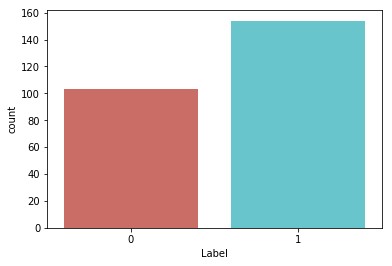

In [6]:
sb.countplot(x='Label',data=HMC_2017, palette='hls')

In [7]:
# predictor 1:Monday open price, if Monday didn't open for that week, use Tuesday
open_prices = []
for row in range(256):
    if (HMC_2017.loc[row]['Day of week'] == 'Friday'):
        open_price = HMC_2017.loc[row+1]['Open']
        open_prices.append(open_price)
        
#open_prices

In [8]:
# predictor 2: True range for the week
# True Range is the maximum of these three: (1)High – Low (2)|High – Previous Close| (3)| low – Pevious Close|
true_ranges = []
for row in range(256):
    if (HMC_2017.loc[row]['Day of week'] == 'Friday'):                                      #a new week start
        previous_close = HMC_2017.loc[row]['Adj Close']
        i = row 
        
        highs = []
        lows = []
        while(HMC_2017.loc[i]['Number of week'] == HMC_2017.loc[i+1]['Number of week']):
            high = HMC_2017.loc[i]['High']
            low = HMC_2017.loc[i]['Low']
            highs.append(high)
            lows.append(low)
            i += 1
        highs.append(HMC_2017.loc[i]['High'])
        lows.append(HMC_2017.loc[i]['Low'])
        weekly_high = max(highs)                      
        weekly_low = min(lows)                                                              #a new week end

        true_range = max((weekly_high-weekly_low),abs(weekly_high-previous_close),abs(weekly_low-previous_close))
        true_ranges.append(true_range)

#true_ranges

In [9]:
# predictor 3: Return from Friday to Monday, if Monday didn't open for that week, use Tuesday
returns = []
for row in range(256):
    if (HMC_2017.loc[row]['Day of week'] == 'Friday'):
        daily_return = HMC_2017.loc[row+1]['Return']
        returns.append(daily_return)
#returns

In [10]:
# labels 
labels = []
for row in range(256):
    if (HMC_2017.loc[row]['Day of week'] == 'Friday'):
        label = HMC_2017.loc[row]['Label']
        labels.append(label)
#labels

In [11]:
number_of_weeks = list(range(1,53))
week_2017_df = pd.DataFrame({ 'Week number': number_of_weeks,
                             'Label' : labels,
                      'Monday open price' :open_prices,
                      'True range' : true_ranges,
                     'Fri to Mon return' : returns})
week_2017_df

,Week number,Label,Monday open price,True range,Fri to Mon return
0,1,0,30.370001,1.196392,-0.001313
1,2,0,29.719999,1.462484,-0.013963
2,3,1,30.299999,1.615322,-0.002628
3,4,0,30.160000,1.452484,-0.004322
4,5,1,30.950001,1.797432,-0.006117
5,6,1,32.020000,1.725612,0.017738
6,7,1,31.700001,1.497038,0.005378
7,8,0,31.270000,1.121334,-0.006677
8,9,1,31.059999,1.210636,-0.006100
9,10,1,31.049999,1.407074,0.000000


In [12]:
X = week_2017_df.iloc[:,2:5]
y = week_2017_df.iloc[:, 1]

split = int(0.75 * len(week_2017_df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [20]:
# deploy logistic regression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = LogReg.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print('\n\n Confusion Matrix \n\n', confusion)



 Confusion Matrix 

 [[0 5]
 [0 8]]


In [38]:
# True Positives
TP = confusion[1, 1]
print("True Positives (TP) : Correct prediction as good day =", TP)
# True Negatives
TN = confusion[0, 0]
print("True Negatives (TN) : Correct prediction as bad day = ", TN)
# False Positives
FP = confusion[0, 1]
print("False Positives (FP) : Incorrect prediction as good day (‘Type I error’) =", FP)
# False Negatives
FN = confusion[1, 0]
print("False Negatives (FN) : Incorrect prediction as bad day (‘Type II error’) =", FN)

True Positives (TP) : Correct prediction as good day = 8
True Negatives (TN) : Correct prediction as bad day =  0
False Positives (FP) : Incorrect prediction as good day (‘Type I error’) = 5
False Negatives (FN) : Incorrect prediction as bad day (‘Type II error’) = 0


In [43]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Recall rate/ True positive rate = ", TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("True negative rate = ", TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("For all instances classified positive, what percent was correct? --> Precision =", PPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False positive rate = ", FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False negative rate = ", FNR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Over all, how often is the classifier correct? --> Accuracy = ", ACC)

Recall rate/ True positive rate =  1.0
True negative rate =  0.0
For all instances classified positive, what percent was correct? --> Precision = 0.6153846153846154
False positive rate =  1.0
False negative rate =  0.0
Over all, how often is the classifier correct? --> Accuracy =  0.6153846153846154


In [29]:
precision_recall_statistics = classification_report(y_test, y_pred)
print('\n\n classification report \n\n', classification_report(y_test, y_pred))



 classification report 

              precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.62      1.00      0.76         8

avg / total       0.38      0.62      0.47        13



/Users/yinchiahuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yinchiahuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- f1 score : The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
- Support : is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [55]:
model_score = LogReg.score(X_test, y_test)
print('\n\n Model Score \n\n', model_score)



 Model Score 

 0.6153846153846154


Accuracy of logistic regression classifier on test set: 0.615

In [54]:
cross_val = cross_val_score(LogisticRegression(), X, y, 
                            scoring='accuracy', cv=10)

print('\n\n cross validation \n\n',  cross_val)
print('\n cross validation mean: \n',  cross_val.mean())
print('\nThe mean cross validation and the 95% confidence interval of the cross validation estimate are:')
print("Accuracy = %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))                                           



 cross validation 

 [0.57142857 0.6        0.6        0.6        0.6        0.6
 0.6        0.4        0.6        0.6       ]

 cross validation mean: 
 0.5771428571428571

The mean cross validation and the 95% confidence interval of the cross validation estimate are:
Accuracy = 0.58 (+/- 0.12)


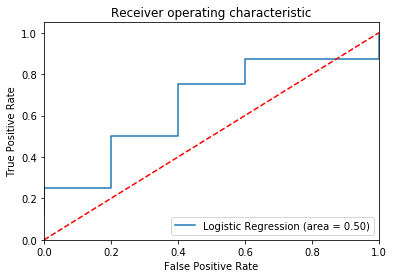

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

Reference:
- https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
- http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8